In [5]:
import requests
import datetime
from bs4 import BeautifulSoup
import pandas as pd
import jieba
from wordcloud import WordCloud
import matplotlib.pyplot as plt

headers = {'Accept':'*/*',
'Accept-Encoding':'gzip, deflate, br',
'Accept-Language':'zh-CN,zh;q=0.8,zh-TW;q=0.7,zh-HK;q=0.5,en-US;q=0.3,en;q=0.2',
'Connection':'keep-alive',
'Content-Length':'0',
'Cookie':"buvid3=697598FB-1DB0-4947-918F-15063BF99F611624infoc; LIVE_BUVID=AUTO7015332866146999; CURRENT_FNVAL=16; stardustvideo=1; rpdid=|(u~|mkklk)J0J'ulY|luRYmm; dssid=96km5495a916879e3; dsess=BAh7CkkiD3Nlc3Npb25faWQGOgZFVEkiFTU0OTVhOTE2ODc5ZTNlOGUGOwBG%0ASSIJY3NyZgY7AEZJIiVlY2Q0ZThjM2MzNGU3ZDRkYWMyZDY5MGNlYmJhYTM3%0AZQY7AEZJIg10cmFja2luZwY7AEZ7B0kiFEhUVFBfVVNFUl9BR0VOVAY7AFRJ%0AIi1mYjA5NmEyNjljYWEzNjJmYjk5MTRlNmNjODgwY2Y5ZmNiMTZiMzBkBjsA%0ARkkiGUhUVFBfQUNDRVBUX0xBTkdVQUdFBjsAVEkiLTExMmNmOTViNmNhODI4%0AYjdjMGExYmY0ZWYzZDg1MGMwMWJlOGEyMWYGOwBGSSIKY3RpbWUGOwBGbCsH%0A354LXUkiCGNpcAY7AEYiEzExNy4xNDMuNTIuMjM1%0A--b88627f76116973ebfb69a7a1bc6afb7e2f43a0a; fts=1561042664; sid=htbbj1lt",
'User-Agent':'Mozilla/5.0 (Windows NT 6.1; rv:67.0) Gecko/20100101 Firefox/67.0'
}

burl='https://www.bilibili.com/ranking'
bdata = requests.get(burl, headers=headers)
bcontent = bdata.text
soup = BeautifulSoup(bcontent,'lxml')
contentsoup = soup.findAll('div', attrs={'class':'info'})
danmuku = {}
# df = pd.DataFrame()
list=[]
# df1 = pd.DataFrame(columns=['A', 'B', 'C', 'D'])
for ct in contentsoup[:3]:
    url = "https:%s"%(ct.find('a').get('href'))
    list.append(url)
    name = ct.find('a').text
    # print(url,name)
    data = requests.get(url, headers=headers)
    content = data.text
    commentlist = content.split('related":')[1]
    comments = commentlist.split(',')
    danmuku[url]={}
    danmuku[url]['标题']=name
    danmuku[url]['时间']=datetime.date.today()
    danmuku[url]['弹幕'] = []
    for comment in comments:
        if('cid"' in comment):
            a=(comment.split(':')[1])
            cidurl=("https://comment.bilibili.com/%s.xml"%(a))
            r=requests.get(cidurl)
            r.encoding='utf8'
            soup=BeautifulSoup(r.text,'lxml')
            d=soup.find_all('d')

            n=0
            for p in d:
                n+=1
                danmuku[url]['弹幕'].append((cidurl, p.text))
                # print(获取了%i条数据' %n)
    # print(danmuku[url])
    # print(danmuku)


    # 将列表变为DataFrame，使用pandas进行分析

    # df = pd.DataFrame(danmuku[url])
    # df1 = df1.append(df)
    # df.append(df1)
    # result = df.append(pd.DataFrame(danmuku[url])

#     dfuku)1=pd.DataFrame(danmuku[url])
#     df = df.append(df1)
# df.to_excel('%s.xlsx'%name)#讲爬下来的数据放在excel里
# print(danm
# result.to_excel('排行榜.xlsx')#讲爬下来的数据放在excel里
# print(list)

i=0
dfz = pd.DataFrame(danmuku[list[i]])

while i<=len(list)-1:
    df = pd.DataFrame(danmuku[list[i]])
    dfz=dfz.append(df)
    i += 1

dfz['弹幕url'] = dfz.apply(lambda x: x['弹幕'][0], axis=1)
dfz['弹幕text'] = dfz.apply(lambda x: x['弹幕'][1], axis=1)
dfz.to_excel('排行2榜.xlsx')
# dfz.to_hdf('排行版.hdf', key='弹幕')
# df1.to_excel('排行1榜.xlsx')

In [6]:
df2=dfz
text=str(df2['弹幕text'])
# list1.to_txt('danmu.txt')
# text = open('danmu.txt','r',encoding='utf-8').read()
# text = ''.join(text)
cut_text = jieba.cut(text)
result = " ".join(cut_text)

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\ADMINI~1\AppData\Local\Temp\2\jieba.cache
Loading model cost 1.063 seconds.
Prefix dict has been built succesfully.


In [7]:
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = 'all' #默认为'last'

<Figure size 3200x3200 with 0 Axes>

<Figure size 432x288 with 0 Axes>

(-0.5, 1023.5, 965.5, -0.5)

<Figure size 3200x3200 with 0 Axes>

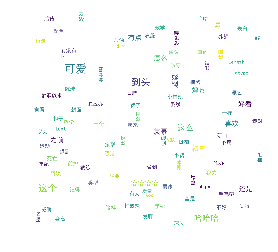

In [10]:
wc = WordCloud(
    font_path='simhei.ttf',     #字体路劲
    background_color='white',   #背景颜色
    width=2000,
    height=1200,
    max_font_size=50,            #字体大小
    min_font_size=10,
    mask=plt.imread('xin.jpg'), #背景图片
    max_words=1000)
wc.generate(result)
wc.to_file('danmu.png') 

#5.显示图片
plt.figure(figsize=(40, 40), dpi=80)
plt.figure('jielun')   #图片显示的名字
plt.imshow(wc)
plt.axis('off')        #关闭坐标
plt.show()

In [11]:
# 显示全部变量
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = 'all' 